In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
data = pd.read_json("../caches/mutation_comparison_results.json")

In [36]:
# Drop any rows for which None appears in the evaluations
data = data[data['evaluations'].apply(lambda x: None not in x)]

In [30]:
data

,split,name,temperature,depth,target_len,evaluations,exact_matches
0,train,Aralzaa,0.5,2,77,"[False, False, False]","[False, False, False]"
1,val,Dama (Kenya),0.5,14,9,"[True, True, True]","[False, False, False]"
2,train,Oumoul Kono,0.5,6,15,"[False, False, False]","[False, False, False]"
3,val,Ho-Bag Gonu,0.5,9,28,"[False, False, False]","[False, False, False]"
4,train,Coc-Inbert,0.5,7,459,"[False, False, False]","[False, False, False]"
...,...,...,...,...,...,...,...
2405,val,Manu,1.5,7,4,"[False, False, False]","[False, False, False]"
2406,train,Lifeline,1.5,17,53,"[False, False, False]","[False, False, False]"
2407,val,Papan Dakon,1.5,3,11,"[False, False, False]","[False, False, False]"
2408,train,Issiren,1.5,4,16,"[True, False, False]","[False, False, False]"


In [14]:
def get_props(subgroup):
    all_evaluations = sum(subgroup['evaluations'], [])
    all_exact_matches = sum(subgroup['exact_matches'], [])
    novel_playable = [(not exact_match) and playable for exact_match, playable in zip(all_exact_matches, all_evaluations)]

    prop_playable = 100 * sum(all_evaluations) / len(all_evaluations)
    prop_exact_matches = 100 * sum(all_exact_matches) / len(all_exact_matches)
    prop_novel_playable = 100 * sum(novel_playable) / len(novel_playable)

    return prop_playable, prop_exact_matches, prop_novel_playable

In [37]:
for temperature, group in data.groupby('temperature'):
    print(f"\n==================== Temperature: {temperature} ====================")
    for split, subgroup in group.groupby('split'):
        print(f"\n======= Split: {split} =======")
        prop_playable, prop_exact_matches, prop_novel_playable = get_props(subgroup)
        print(f"[OVERALL] {prop_playable:.2f}% playable, {prop_exact_matches:.2f}% exact matches, {prop_novel_playable:.2f}% novel-playable ({len(subgroup)} evals)")

        # for depth, subsubgroup in subgroup.groupby('depth'):
        #     prop_playable, prop_exact_matches, prop_novel_playable = get_props(subsubgroup)

        #     print(f"[Depth: {depth}] {prop_playable:.2f}% playable, {prop_exact_matches:.2f}% exact matches, {prop_novel_playable:.2f}% novel-playable ({len(subsubgroup)} evals)")


==================== Temperature: 1.0 ====================

======= Split: train =======
[OVERALL] 95.24% playable, 84.72% exact matches, 10.72% novel-playable (500 evals)

======= Split: val =======
[OVERALL] 92.40% playable, 57.56% exact matches, 35.84% novel-playable (500 evals)

==================== Temperature: 1.5 ====================

======= Split: train =======
[OVERALL] 89.72% playable, 79.52% exact matches, 10.40% novel-playable (500 evals)

======= Split: val =======
[OVERALL] 87.96% playable, 57.40% exact matches, 31.12% novel-playable (500 evals)

==================== Temperature: 2.0 ====================

======= Split: train =======
[OVERALL] 77.52% playable, 75.36% exact matches, 17.00% novel-playable (500 evals)

======= Split: val =======
[OVERALL] 74.48% playable, 48.68% exact matches, 35.36% novel-playable (500 evals)

==================== Temperature: 2.5 ====================

======= Split: train =======
[OVERALL] 58.12% playable, 59.04% exact matches, 23.00% no

In [20]:
data = pd.read_json("../exp_outputs/mutations.json")

In [24]:
data.keys()

Index(['depth', 'trace_score', 'id', 'compilable', 'playable', 'balance',
       'drawishness', 'completion', 'mean_turns', 'initial_trace_score',
       'initial_compilable', 'initial_playable', 'initial_balance',
       'initial_drawishness', 'initial_completion', 'initial_mean_turns'],
      dtype='object')

In [21]:
data = data.drop(columns=["game_name", "prefix", "suffix", "output"])
# data = data.drop(columns=["game_name", "id"])

In [23]:
aggregated = data.groupby("id").mean()

In [25]:
for key in ["drawishness", "balance", "completion", "mean_turns", "trace_score"]:
    aggregated[key+"_delta"] = aggregated[key] - aggregated["initial_"+key]

## Change in Trace Score Caused by Mutation

<Axes: >

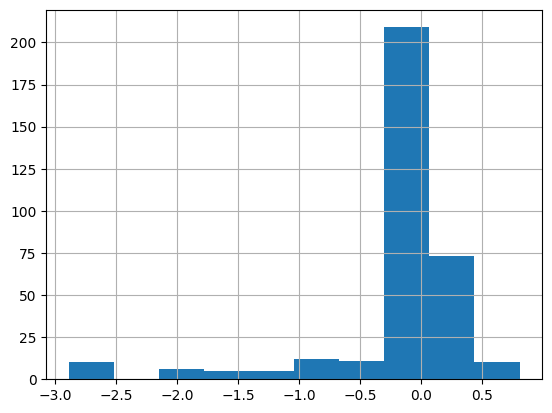

In [32]:
aggregated["trace_score_delta"].hist()

<Axes: >

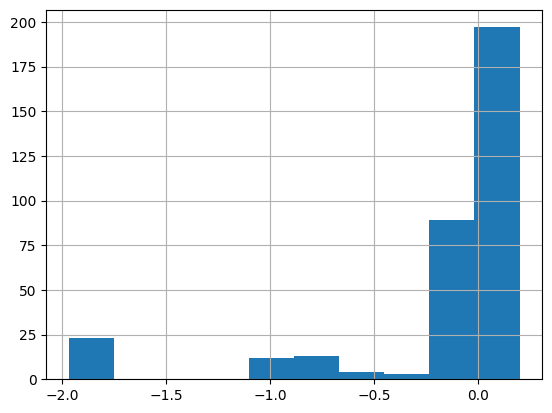

In [33]:
aggregated["balance_delta"].hist()

<Axes: >

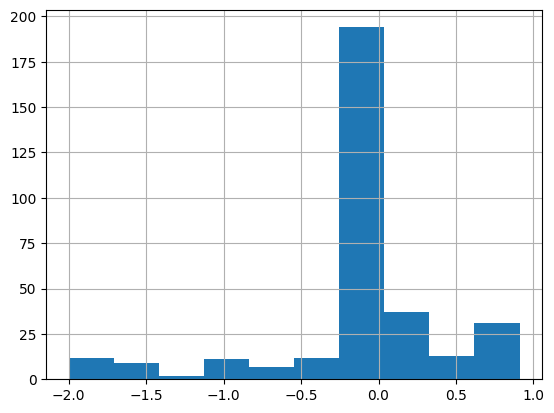

In [34]:
aggregated["completion_delta"].hist()

In [2]:
data = pd.read_json("../results/code-llama-13b-fitm.json")

In [16]:
data["prefix_length"] = data["prefix"].apply(lambda x: len(x))
data["suffix_length"] = data["suffix"].apply(lambda x: len(x))
data["target_length"] = data["target"].apply(lambda x: len(x))
data["target_depth"] = data["prefix"].apply(lambda x: x.count("(") - x.count(")"))

In [17]:
data

,index,prefix,suffix,target,output,game,exact_match,compilable,playable,prefix_length,suffix_length,target_length,target_depth
0,0,,,"(game ""Fettas"" (players 2) (equipment {(board...","(game ""Doov"" (players {(player N) (player S)}...","(game ""Doov"" (players {(player N) (player S)})...",False,True,True,1,2,750,0
1,1,"(game ""Fettas""",(equipment {(board (concentric Square rings:3...,(players 2),(players 2),"(game ""Fettas"" (players 2) (equipment {(boa...",True,True,True,16,724,13,1
2,2,"(game ""Fettas"" (players 2)","(rules (start (place ""Marker"" ""Hand"" count:11...",(equipment {(board (concentric Square rings:3...,"(equipment {(board (square 8)) (piece ""Counte...","(game ""Fettas"" (players 2) (equipment {(boar...",False,False,False,28,535,190,1
3,3,"(game ""Fettas"" (players 2) (equipment {(board ...",),"(rules (start (place ""Marker"" ""Hand"" count:11...","(rules (start (place ""Marker"" ""Hand"" count:9)...","(game ""Fettas"" (players 2) (equipment {(board ...",False,True,True,217,3,533,1
4,4,"(game ""Fettas"" (players 2) (equipment {","(hand Each) (piece ""Marker"" Each (move Step (...",(board (concentric Square rings:3) use:Vertex),(board (merge {(rectangle 1 6) (shift 7 0 (re...,"(game ""Fettas"" (players 2) (equipment { (boar...",False,True,True,40,665,48,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,6935,"(game ""Wolf and Sheep"" (players 2) (equipment ...",") (result P1 Win)) (if (is In (where ""Wolf"" P2...",(is Mover P2),(is Mover P1),"(game ""Wolf and Sheep"" (players 2) (equipment ...",False,True,True,341,86,15,5
6936,6936,"(game ""Wolf and Sheep"" (players 2) (equipment ...",(sites Bottom)) (result P2 Win))}))),"(where ""Wolf"" P2)","(where ""Wolf"" P2)","(game ""Wolf and Sheep"" (players 2) (equipment ...",True,True,True,384,39,19,5
6937,6937,"(game ""Wolf and Sheep"" (players 2) (equipment ...",) (result P2 Win))}))),(sites Bottom),(sites Phase 0),"(game ""Wolf and Sheep"" (players 2) (equipment ...",False,True,False,402,24,16,5
6938,6938,"(game ""Wolf and Sheep"" (players 2) (equipment ...",")))) (piece ""Wolf"" P2 (move Step Diagonal (to ...",(to),(to),"(game ""Wolf and Sheep"" (players 2) (equipment ...",True,True,True,136,300,6,6


In [18]:
print(f"Correlation between prefix length and exact match: {data['prefix_length'].corr(data['exact_match'])}")
print(f"Correlation between suffix length and exact match: {data['suffix_length'].corr(data['exact_match'])}")
print(f"Correlation between target length and exact match: {data['target_length'].corr(data['exact_match'])}")
print(f"Correlation between target depth and exact match: {data['target_depth'].corr(data['exact_match'])}")

Correlation between prefix length and exact match: 0.19602798173057454
Correlation between suffix length and exact match: 0.05510079210307553
Correlation between target length and exact match: -0.35529249092146986
Correlation between target depth and exact match: 0.3598915888289494


In [19]:
print(f"Correlation between prefix length and compilability: {data['prefix_length'].corr(data['compilable'])}")
print(f"Correlation between suffix length and compilability: {data['suffix_length'].corr(data['compilable'])}")
print(f"Correlation between target length and compilability: {data['target_length'].corr(data['compilable'])}")
print(f"Correlation between target depth and compilability: {data['target_depth'].corr(data['compilable'])}")

Correlation between prefix length and compilability: 0.09756971220493903
Correlation between suffix length and compilability: -0.013678262862318163
Correlation between target length and compilability: -0.15418499654779808
Correlation between target depth and compilability: 0.1373216574732629


In [9]:
data[data["exact_match"] == False]["playable"].value_counts()

playable
True     1814
False     321
Name: count, dtype: int64